# <span style="color:darkorange"> Exercises 02 (NSL) </span>
# <span style="color:darkorange"> 02.1: Monte Carlo 1-D integration </span>

The integral

$$I = \int_0^1 \frac{\pi}{2}\cos\left(\frac{\pi}{2} x\right) dx = 1$$

can be computed approximately via Monte Carlo methods. Changing the <font style="color:darkorange">sampling method</font> can enhance the estimate quality, i.e. reduce the <font style="color:darkorange">variance</font>.

For the sake of comparison, two estimations of $I$, obtained with two different methods, and their uncertainties are plotted as a function of the number of blocks, being $M=10^5$ the number of throws and $N=100$ the number of blocks. Setting the same range in the $y$ axis is useful for comparing <font style="color:darkorange">how the two methods perform</font>, especially in the first blocks.

## 02.1.1: 

* **Method 1:** sampling a <font style="color:darkorange">uniform distribution</font> in $[0,1]$ 

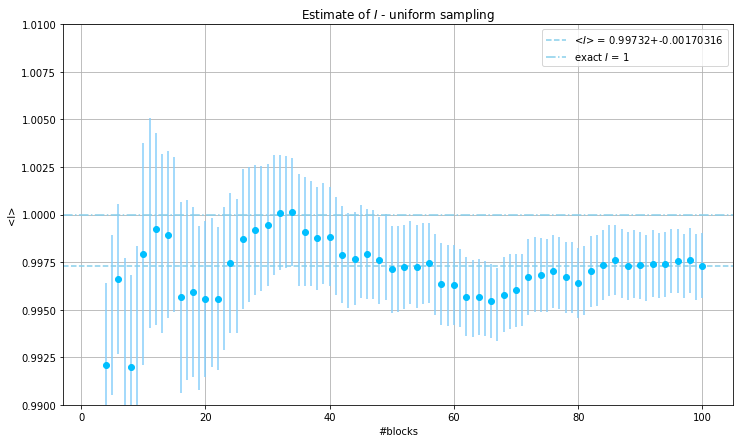

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.arange(2, len(open('I_uniform_averages.dat').readlines()) + 2)
y = np.loadtxt('I_uniform_averages.dat')
error_bars = np.loadtxt('I_uniform_errors.dat')

plt.figure(figsize=(12, 7))
mean_integral=y[-1]
error=error_bars[-1]
plt.axhline(y=mean_integral, color='skyblue', label='<$I$> = '+str(mean_integral)+'+-'+str(error), ls='dashed' ) 
plt.axhline(y=1., color='skyblue', label='exact $I$ = 1', ls='dashdot' ) 
plt.errorbar(x, y, yerr=error_bars, fmt='o', color='deepskyblue', ecolor='lightskyblue', markevery=2)
plt.xlabel('#blocks')
plt.ylabel('<I>')
plt.ylim(1.-0.01, 1.+0.01)
plt.title('Estimate of $I$ - uniform sampling')
plt.legend()
plt.grid(True)
plt.show()

## 02.1.2: 

* **Method 2:** using <font style="color:darkorange">importance sampling</font>, i.e. sampling a non-uniform probability that resembles the integrand in $[0,1]$.

The strategy used to approximate the integrand $f(x)$ consists in <font style="color:darkorange">Taylor-expanding</font> it around $x=1$ (where $f$ changes sign): if $x \to 1$, let $x=1+y$ as $y \to 0$. Then
$$\cos\left(\frac{\pi}{2} (1+y)\right) = -\sin\left(\frac{\pi}{2} y\right) = -\frac{\pi}{2}y + o(y) = -\frac{\pi}{2}(x-1) + o(x-1)$$
so a suitable PDF for extracting $x$ on $[0,1]$ is $p(x)=C(1-x)$, where $C$ is a <font style="color:darkorange">normalization</font> constant ($C=2$). 

By the <font style="color:darkorange">inverse transform sampling</font>, $y=F_x(x)=\int_0^x p(t)dt=2x-x^2$ is extracted uniformly between $0$ and $1$ and then, when inverting $y(x)$, two solutions arise. The correct branch is such that $0\leq x\leq1$, i.e. $1-\sqrt{1-y}$.

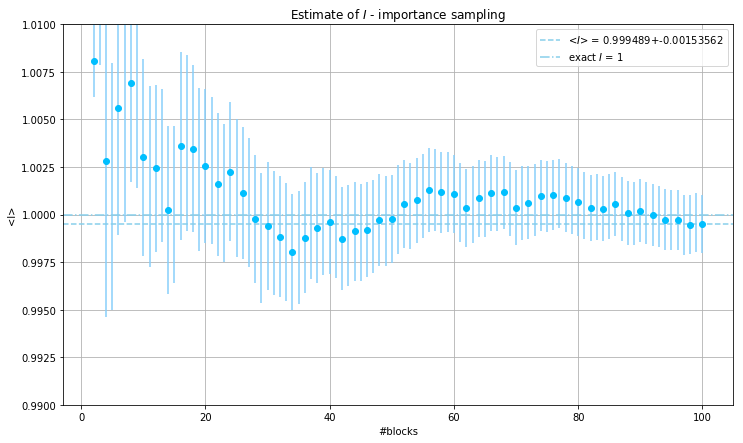

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.arange(2, len(open('I_importance_averages.dat').readlines()) + 2)
y = np.loadtxt('I_importance_averages.dat') 
error_bars = np.loadtxt('I_importance_errors.dat')

plt.figure(figsize=(12, 7))
mean_integral=y[-1]
error=error_bars[-1]
plt.axhline(y=mean_integral, color='skyblue', label='<$I$> = '+str(mean_integral)+'+-'+str(error), ls='dashed' )
plt.axhline(y=1., color='skyblue', label='exact $I$ = 1', ls='dashdot' )
plt.errorbar(x, y, yerr=error_bars, fmt='o', color='deepskyblue', ecolor='lightskyblue', markevery=2)
plt.xlabel('#blocks')
plt.ylabel('<I>')
plt.ylim(1.-0.01, 1.+0.01)
plt.title('Estimate of $I$ - importance sampling')
plt.legend()
plt.grid(True)
plt.show()

# <span style="color:darkorange"> 02.2: 3D Random Walks (RW) </span>

To implement blocking, <font style="color:darkorange">matrices</font> turn out to be useful. A block $j$ of walks may be initially stored in a $(\# $ of steps) $\times (\#$ of throws per block$)$ matrix, which can be <font style="color:darkorange">reduced into a single column vector $\underline{v}^{(j)}$</font> ; each component $v^{(j)}_i$ is the <font style="color:darkorange">average on the block $j$</font>, i.e. the average along a row, <font style="color:darkorange">at a fixed step $i$ </font>.

## 02.2.1:

* **Cubic lattice:** at each time, the walker is constrained to move by a <font style="color:darkorange">fixed amount $a=1$</font> along the <font style="color:darkorange">$x$, $y$ or $z$ direction</font>.

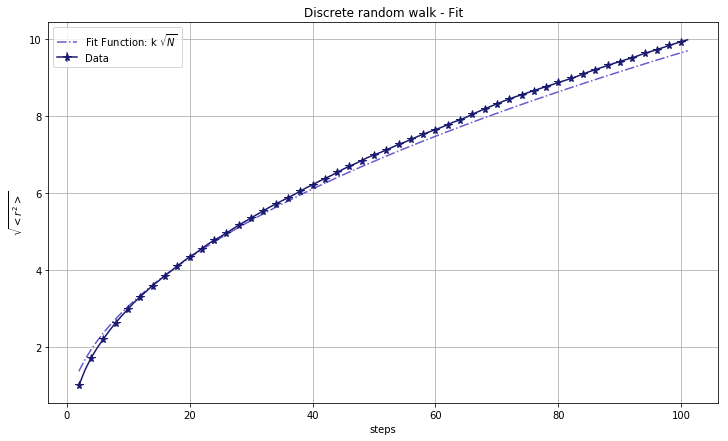

Fit Results:
Constant: 0.9644645447656414


In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Define the fit function
def fit_function(x, constant):
    return constant * np.sqrt(x)

# Load data
x = np.arange(2, len(open('discrete_AVG.dat').readlines()) + 2)
y = np.loadtxt('discrete_AVG.dat')
error_bars = np.loadtxt('discrete_ERR.dat')

# Perform the fit
popt, pcov = curve_fit(fit_function, x, y, sigma=error_bars, absolute_sigma=True)

# Extract the fit parameters
constant_fit = popt[0]

# Plot the data and fit function
plt.figure(figsize=(12, 7))
plt.errorbar(x, y, yerr=error_bars, color='midnightblue', ecolor='slateblue', marker='*', markersize=8, markevery=2, label='Data')
plt.plot(x, fit_function(x, constant_fit), color='slateblue', linestyle='dashdot', label='Fit Function: k $\sqrt{N}$')
plt.xlabel('steps')
plt.ylabel('$\sqrt{<r^2>}$')
plt.title('Discrete random walk - Fit')
plt.grid(True)
plt.legend()
plt.show()

# Print the fit results
print(f'Fit Results:')
print(f'Constant: {constant_fit}') 
        

## 02.2.2:

* **Continuum:** at each time, the <font style="color:darkorange">displacement</font> is still <font style="color:darkorange">fixed at $a=1$</font>, but <font style="color:darkorange">any direction</font> in space is available.

To make sure that the direction is sampled <font style="color:darkorange">isotropically</font>, two strategies may be implemented:
* extracting a point $(x,y,z)$ uniformly on the cube $[-1,1]\times[-1,1]\times[-1,1]$, <font style="color:darkorange">accepting it only if it belongs to the unit ball $\mathcal{B}_1(0)$</font>; finally, the cartesian coordinates are converted to spherical (ignoring the radial component);
* extracting $\varphi$ uniformly on $[0,2\pi]$ and  $\theta\in[0,\pi]$ according to a PDF ($w(x)=\sin(\theta)/2$) that weighs differently different directions, to compensate for the <font style="color:darkorange">distortion introduced by spherical coordinates</font>.

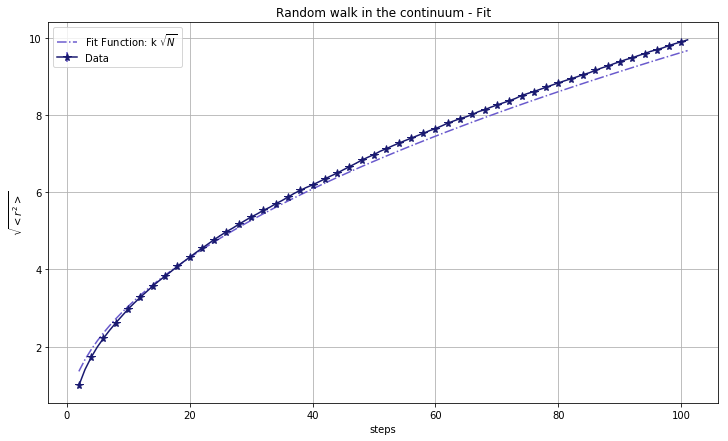

Fit Results:
Constant: 0.9619994567448438


In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Define the fit function
def fit_function(x, constant):
    return constant * np.sqrt(x)

# Load data
x = np.arange(2, len(open('continuum_AVG.dat').readlines()) + 2)
y = np.loadtxt('continuum_AVG.dat')
error_bars = np.loadtxt('continuum_ERR.dat')

# Perform the fit
popt, pcov = curve_fit(fit_function, x, y, sigma=error_bars, absolute_sigma=True)

# Extract the fit parameters
constant_fit = popt[0]

# Plot the data and fit function
plt.figure(figsize=(12, 7))
plt.errorbar(x, y, yerr=error_bars, color='midnightblue', ecolor='slateblue', marker='*', markersize=8, markevery=2, label='Data')
plt.plot(x, fit_function(x, constant_fit), color='slateblue', linestyle='dashdot', label='Fit Function: k $\sqrt{N}$')
plt.xlabel('steps')
plt.ylabel('$\sqrt{<r^2>}$')
plt.title('Random walk in the continuum - Fit')
plt.grid(True)
plt.legend()
plt.show()

# Print the fit results
print(f'Fit Results:')
print(f'Constant: {constant_fit}')